In [32]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.model_selection import train_test_split

### Unione tabelle

In [44]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

df_test_reg = pd.read_csv('test_reg.csv')

df_test = pd.read_csv('test_log.csv')

# Eseguiamo la left join
df_test = pd.merge(df_test, df_test_reg, on='originalTitle', how='left')
df_test.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,21,0.0,2.772589,2.079442,1.098612,11,video,0.0,False,False,1,['US'],"Music,Short",9.5,0.000000,9.6
1,Shan gou 1999,"(4, 5]",1999,93,0.0,5.720312,2.397895,0.000000,40,movie,0.0,False,False,4,['HK'],Horror,4.5,2.890372,4.3
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,113,0.0,2.397895,1.098612,0.000000,6,tvSpecial,0.0,False,False,1,['US'],Reality-TV,8.5,0.000000,8.8
3,Week 3: Tuesday,"(6, 7]",2020,40,0.0,2.484907,0.000000,0.000000,52,tvEpisode,0.0,False,False,1,['GB'],Game-Show,6.5,0.000000,6.9
4,Traumhaus,"(5, 6]",1999,90,0.0,4.983607,1.098612,0.000000,44,tvEpisode,0.0,False,False,1,['DE'],"Crime,Drama,Mystery",5.5,0.693147,6.0


# Simple Regression

### Reviews - numVotes

#### Reg

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [46]:
# Selezioniamo la variabile indipendente (input) e la variabile dipendente (target)
X_train = df_train[['ReviewsTotal']]
y_train = df_train['numVotes']

X_test = df_test[['ReviewsTotal']]
y_test = df_test['numVotes']

# Dividiamo i dati in set di addestramento e di test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcoliamo le metriche di valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Coefficients: 
 [1.20565371]
Intercept: 
 3.016752817897713


In [47]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.647
MSE: 1.052
MAE: 0.790


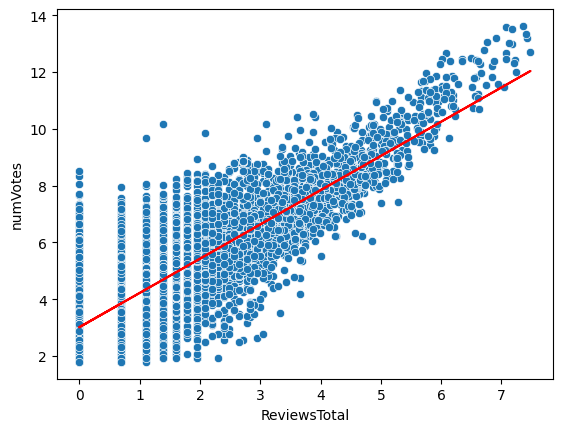

In [48]:
sns.scatterplot(data=df_train, x="ReviewsTotal", y="numVotes")
plt.plot(X_train, model.coef_[0]*X_train+model.intercept_, c="red")

#### Ridge

In [49]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)


ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

# print('Coefficients: \n', model.coef_)
# print('Intercept: \n', model.intercept_)

Coefficients: 
 [1.20565371]
Intercept: 
 3.016752817897713


In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test)

# Visualizzare i coefficienti e l'intercetta
print("Coefficients:", best_ridge_model.coef_)
print("Intercept:", best_ridge_model.intercept_)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
Coefficients: [1.2056537]
Intercept: 3.016752821727607
R²: 0.6473051232645011
Mean Squared Error (MSE): 1.0523559483947116
Mean Absolute Error (MAE): 0.7896828590712623


#### Lasso

In [52]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)


lasso = Lasso()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [53]:
grid_search.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [1.20565371]
Intercept: 
 3.016752817897713


In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
R²: 0.6473079087436606
Mean Squared Error (MSE): 1.0523476372006566
Mean Absolute Error (MAE): 0.7896839553585134


#### DecisionTree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
# from sklearn.model_selection import RandomizedSearchCV, cross_val_score
# from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor
# from scipy.stats import randint
# import numpy as np

# # Definisci la griglia dei parametri (solo max_depth)
# param_dist = {
#     'max_depth': randint(1, 20)
# }

# # Crea il modello
# model = DecisionTreeRegressor()

# # Definisci le metriche di valutazione
# scoring = {
#     'R2': make_scorer(r2_score),
#     'MSE': make_scorer(mean_squared_error),
#     'MAE': make_scorer(mean_absolute_error)
# }

# # Esegui la Random Search
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
# random_search.fit(X_train, y_train)

# # Stampa i migliori parametri trovati
# print("Best parameters found: ", random_search.best_params_)

# # Stampa i punteggi per le metriche
# print("Best R2: ", random_search.best_score_)
# print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
# print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

In [57]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (includendo max_depth, min_samples_split e min_samples_leaf)
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 13}
Best R2:  0.6604548517452073
Best MSE:  1.017989654637741
Best MAE:  0.7932279467573716


In [58]:
# Crea il modello
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf = 3, min_samples_split = 13)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
y_pred

R2: 0.648
MSE: 1.049
MAE: 0.790


array([3.06167207, 6.51195756, 3.06167207, ..., 3.06167207, 4.703491  ,
       3.06167207])

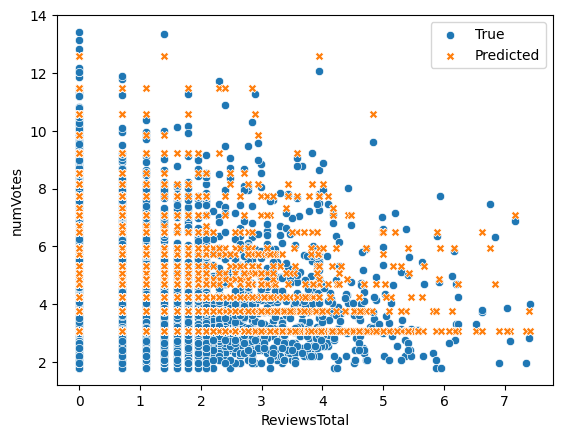

In [59]:
# Crea un nuovo DataFrame con le previsioni
df_test_pred = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'numVotes': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test_pred, x="ReviewsTotal", y="numVotes", label="True")
sns.scatterplot(data=df_test_pred, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=-0.134, MSE=3.385, MAE=1.526
k=2: R2=0.477, MSE=1.560, MAE=0.997
k=3: R2=0.567, MSE=1.291, MAE=0.900
k=4: R2=0.603, MSE=1.185, MAE=0.852
k=5: R2=0.630, MSE=1.103, MAE=0.820
k=6: R2=0.619, MSE=1.136, MAE=0.849
k=7: R2=0.617, MSE=1.142, MAE=0.851
k=8: R2=0.624, MSE=1.121, MAE=0.836
k=9: R2=0.631, MSE=1.101, MAE=0.829
k=10: R2=0.636, MSE=1.086, MAE=0.812
k=11: R2=0.641, MSE=1.070, MAE=0.803
k=12: R2=0.641, MSE=1.072, MAE=0.804
k=13: R2=0.640, MSE=1.073, MAE=0.797
k=14: R2=0.642, MSE=1.067, MAE=0.798
k=15: R2=0.641, MSE=1.071, MAE=0.797
k=16: R2=0.639, MSE=1.077, MAE=0.812
k=17: R2=0.640, MSE=1.073, MAE=0.805
k=18: R2=0.640, MSE=1.073, MAE=0.800
k=19: R2=0.640, MSE=1.075, MAE=0.802
k=20: R2=0.642, MSE=1.069, MAE=0.797
k=21: R2=0.642, MSE=1.067, MAE=0.795
k=22: R2=0.642, MSE=1.069, MAE=0.792
k=23: R2=0.642, MSE=1.069, MAE=0.791
k=24: R2=0.640, MSE=1.075, MAE=0.790
k=25: R2=0.641, MSE=1.071, MAE=0.792
k=26: R2=0.640, MSE=1.074, MAE=0.792
k=27: R2=0.638, MSE=1.079, MAE=0.793
k=28: R2=

In [62]:
reg = KNeighborsRegressor(n_neighbors=99)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.640
MSE: 1.075
MAE: 0.818


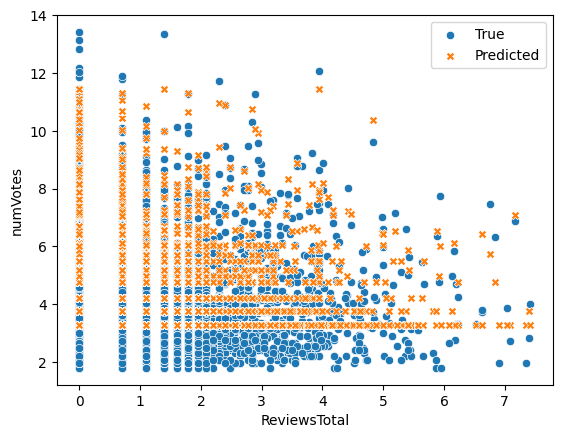

In [63]:
# Crea un nuovo DataFrame con le previsioni
df_test_pred = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'numVotes': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test_pred, x="ReviewsTotal", y="numVotes", label="True")
sns.scatterplot(data=df_test_pred, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

### ReviewsTotal - ratingMean

#### Reg

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [65]:
# # Select only numeric columns
# numeric_df = df_train.select_dtypes(include=['number'])

# # Calculate correlation matrix
# corr_matrix = numeric_df.corr()
# corr_matrix
df_test

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,21,0.0,2.772589,2.079442,1.098612,11,video,0.0,False,False,1,['US'],"Music,Short",9.5,0.000000,9.6
1,Shan gou 1999,"(4, 5]",1999,93,0.0,5.720312,2.397895,0.000000,40,movie,0.0,False,False,4,['HK'],Horror,4.5,2.890372,4.3
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,113,0.0,2.397895,1.098612,0.000000,6,tvSpecial,0.0,False,False,1,['US'],Reality-TV,8.5,0.000000,8.8
3,Week 3: Tuesday,"(6, 7]",2020,40,0.0,2.484907,0.000000,0.000000,52,tvEpisode,0.0,False,False,1,['GB'],Game-Show,6.5,0.000000,6.9
4,Traumhaus,"(5, 6]",1999,90,0.0,4.983607,1.098612,0.000000,44,tvEpisode,0.0,False,False,1,['DE'],"Crime,Drama,Mystery",5.5,0.693147,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,Parasiz yasamak pahali,"(7, 8]",1994,141,0.0,3.828641,0.693147,0.000000,12,video,0.0,False,False,1,['TR'],Comedy,7.5,0.000000,7.2
5693,Wedding Bell Blues,"(6, 7]",1994,22,0.0,2.995732,2.890372,0.000000,35,tvEpisode,0.0,False,False,1,['US'],"Comedy,Family,Sport",6.5,0.000000,6.5
5694,O anthropos pou to 'paize poly!,"(3, 4]",1983,85,0.0,2.708050,0.693147,0.000000,30,movie,0.0,False,False,1,['GR'],Comedy,3.5,0.000000,3.5
5695,Above Average Presents,"(6, 7]",2012,50,0.0,4.718499,4.043051,0.000000,992,tvSeries,0.0,True,False,2,['US'],Comedy,6.5,1.386294,6.5


In [66]:
# Selezioniamo la variabile indipendente (input) e la variabile dipendente (target)
print(df_train)
X_train = df_train[['startYear']]
y_train = df_train['averageRating']

X_test = df_test[['startYear']]
y_test = df_test['averageRating']

# Dividiamo i dati in set di addestramento e di test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

# Calcoliamo le metriche di valutazione del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

                                 originalTitle   rating  startYear  \
0      Neogenic Nightmare Chapter 3: Hydro-Man   (7, 8]       1995   
1                                      Looping   (5, 6]       1982   
2                               Idealnaya para   (5, 6]       1992   
3                  MasterChef Celebrity México   (5, 6]       2021   
4                                  Seutateueob   (7, 8]       2020   
...                                        ...      ...        ...   
19419                                 Caprices   (5, 6]       1942   
19420                                Haar Jeet   (4, 5]       1990   
19421                              Kotigobba 3   (5, 6]       2021   
19422                       Ator l'invincibile   (3, 4]       1982   
19423                        Anniversary Night  (9, 10]       2022   

       runtimeMinutes  awardWins  numVotes  totalImages  totalVideos  \
0                  40   0.000000  6.659294     0.693147     0.000000   
1              

In [67]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.032
MSE: 1.691
MAE: 0.989


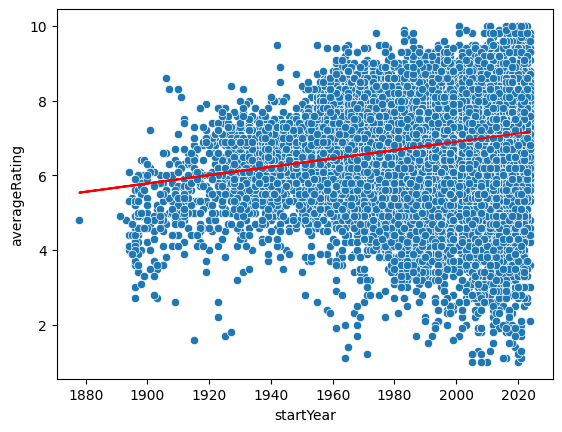

In [68]:
sns.scatterplot(data=df_train, x="startYear", y="averageRating")
plt.plot(X_train, model.coef_[0]*X_train+model.intercept_, c="red")

#### Ridge

In [69]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)
alphas = [0.0001]

ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [70]:
grid_search.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [0.01114809]
Intercept: 
 -15.401138914707976


In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
R²: 0.03211370145124115
Mean Squared Error (MSE): 1.6910568372203447
Mean Absolute Error (MAE): 0.9889885208057193


#### Lasso

In [72]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)


lasso = Lasso()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [73]:
grid_search.fit(X_train, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [0.01114809]
Intercept: 
 -15.401138914707976


In [74]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
R²: 0.03211382983817013
Mean Squared Error (MSE): 1.691056612907226
Mean Absolute Error (MAE): 0.9889886403719071


#### DecisionTree

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (includendo max_depth, min_samples_split e min_samples_leaf)
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 19}
Best R2:  0.05121554785907727
Best MSE:  1.5410772637452494
Best MAE:  0.9387709267772534


In [77]:
# Crea il modello
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Use X_test for predictions
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
y_pred

R2: 0.041
MSE: 1.676
MAE: 0.982


array([7.09202351, 6.78253425, 7.09202351, ..., 6.69246231, 6.9789172 ,
       7.09202351])

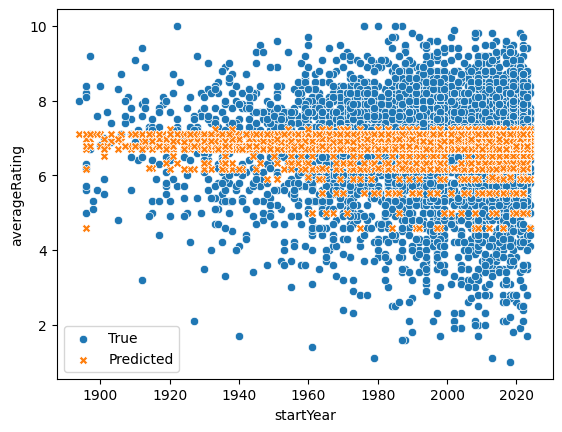

In [78]:
# Crea un nuovo DataFrame con le previsioni
df_test_pred = pd.DataFrame({
    'startYear': df_train.loc[X_test.index, 'startYear'],
    'averageRating': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test_pred, x="startYear", y="averageRating", label="True")
sns.scatterplot(data=df_test_pred, x="startYear", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

#### KNN Regressor

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=-0.768, MSE=3.089, MAE=1.379
k=2: R2=-0.337, MSE=2.335, MAE=1.196
k=3: R2=-0.285, MSE=2.245, MAE=1.164
k=4: R2=-0.212, MSE=2.118, MAE=1.125
k=5: R2=-0.186, MSE=2.072, MAE=1.114
k=6: R2=-0.157, MSE=2.022, MAE=1.102
k=7: R2=-0.133, MSE=1.980, MAE=1.089
k=8: R2=-0.112, MSE=1.943, MAE=1.078
k=9: R2=-0.098, MSE=1.918, MAE=1.070
k=10: R2=-0.075, MSE=1.877, MAE=1.057
k=11: R2=-0.053, MSE=1.840, MAE=1.047
k=12: R2=-0.039, MSE=1.815, MAE=1.037
k=13: R2=-0.050, MSE=1.834, MAE=1.047
k=14: R2=-0.050, MSE=1.835, MAE=1.049
k=15: R2=-0.047, MSE=1.829, MAE=1.048
k=16: R2=-0.030, MSE=1.799, MAE=1.039
k=17: R2=-0.023, MSE=1.788, MAE=1.035
k=18: R2=-0.019, MSE=1.781, MAE=1.033
k=19: R2=-0.021, MSE=1.784, MAE=1.034
k=20: R2=-0.019, MSE=1.780, MAE=1.033
k=21: R2=-0.015, MSE=1.773, MAE=1.032
k=22: R2=-0.011, MSE=1.767, MAE=1.030
k=23: R2=-0.005, MSE=1.756, MAE=1.029
k=24: R2=-0.000, MSE=1.747, MAE=1.026
k=25: R2=-0.002, MSE=1.750, MAE=1.027
k=26: R2=-0.004, MSE=1.755, MAE=1.029
k=27: R2=-0.003, MSE=

In [81]:
reg = KNeighborsRegressor(n_neighbors=127)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.034
MSE: 1.687
MAE: 0.988


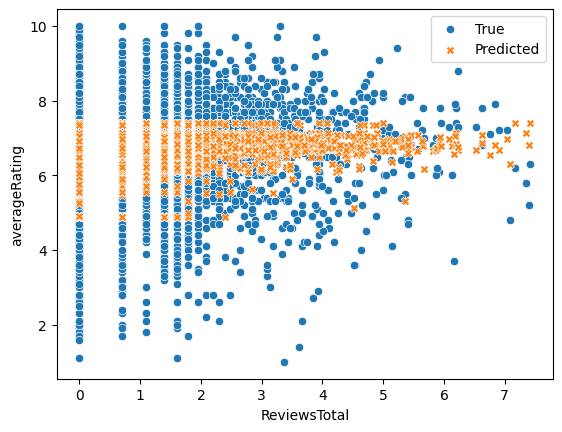

In [82]:
# Crea un nuovo DataFrame con le previsioni
df_test_pred = pd.DataFrame({
    'ReviewsTotal': df_train.loc[X_test.index, 'ReviewsTotal'],
    'averageRating': y_test,
    'Predicted': y_pred
})

# Crea il grafico usando il nuovo DataFrame
sns.scatterplot(data=df_test_pred, x="ReviewsTotal", y="averageRating", label="True")
sns.scatterplot(data=df_test_pred, x="ReviewsTotal", y="Predicted", label="Predicted", marker="X")
plt.legend()
plt.show()

# Multiple Regression

### Num Votes

In [83]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

df_test_reg = pd.read_csv('test_reg.csv')

df_test = pd.read_csv('test_log.csv')

# Eseguiamo la left join
df_test = pd.merge(df_test, df_test_reg, on='originalTitle', how='left')
df_test.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,21,0.0,2.772589,2.079442,1.098612,11,video,0.0,False,False,1,['US'],"Music,Short",9.5,0.000000,9.6
1,Shan gou 1999,"(4, 5]",1999,93,0.0,5.720312,2.397895,0.000000,40,movie,0.0,False,False,4,['HK'],Horror,4.5,2.890372,4.3
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,113,0.0,2.397895,1.098612,0.000000,6,tvSpecial,0.0,False,False,1,['US'],Reality-TV,8.5,0.000000,8.8
3,Week 3: Tuesday,"(6, 7]",2020,40,0.0,2.484907,0.000000,0.000000,52,tvEpisode,0.0,False,False,1,['GB'],Game-Show,6.5,0.000000,6.9
4,Traumhaus,"(5, 6]",1999,90,0.0,4.983607,1.098612,0.000000,44,tvEpisode,0.0,False,False,1,['DE'],"Crime,Drama,Mystery",5.5,0.693147,6.0


In [84]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']
del df_train['titleType'] 
del df_train['ratingMean']

In [85]:
del df_test['originalTitle']
del df_test['rating']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']
del df_test['titleType'] 
del df_test['ratingMean']

#### Reg

In [86]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [87]:
# Selezioniamo le variabili indipendenti (input) e la variabile dipendente (target)
X_train = df_train.drop(columns='numVotes')
y_train = df_train['numVotes']

X_test = df_test.drop(columns='numVotes')
y_test = df_test['numVotes']
# Dividiamo i dati in set di addestramento e di test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [89]:
X_train_lin = X_train_scaled
X_test_lin = X_test_scaled

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_lin.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lin.values, i) for i in range(len(X_train_lin.columns))]

print(vif_data.round(2))

          feature   VIF
0       startYear  1.15
1  runtimeMinutes  1.13
2       awardWins  1.89
3     totalImages  1.59
4     totalVideos  1.52
5    totalCredits  1.42
6      AwNmExWins  2.14
7      numRegions  1.79
8    ReviewsTotal  2.19
9   averageRating  1.10


In [91]:
# del X_train_lin['startYear']
# # #del X_train['averageRating']

# del X_test_lin['startYear']
# # #del X_test['averageRating']

In [92]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# # Supponiamo che 'X' sia il DataFrame delle caratteristiche
# vif_data = pd.DataFrame()
# vif_data["feature"] =X_train_lin.columns
# vif_data["VIF"] = [variance_inflation_factor(X_train_lin.values, i) for i in range(len(X_train_lin.columns))]

# print(vif_data)

In [93]:
# Addestriamo il modello sui dati di addestramento
model.fit(X_train_lin, y_train)

print('Coefficients: \n', model.coef_.round(7))
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_lin)

Coefficients: 
 [ 0.0056711 -0.0075317  0.013883   0.2659466 -0.0020942  0.2546774
 -0.0308766  0.0096762  1.1727236  0.067996 ]
Intercept: 
 4.041986429992915


Vengono eliminate in contemporanea e cosi che numvotes arriva a un vif accettabili e la bonta del modello resta buona

In [94]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.687
MSE: 0.933
MAE: 0.734


Migliorato

#### Ridge

In [95]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)
#alphas = [0.0001]

ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [96]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 0.00567107 -0.00753166  0.01388299  0.26594656 -0.00209421  0.25467744
 -0.03087665  0.00967621  1.17272357  0.06799597]
Intercept: 
 4.041986429992915


In [97]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 11.513953993264458
R²: 0.6874809166434466
Mean Squared Error (MSE): 0.9324811276002003
Mean Absolute Error (MAE): 0.7336896751101012


#### Lasso

In [98]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)


lasso = Lasso()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [99]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 0.00567107 -0.00753166  0.01388299  0.26594656 -0.00209421  0.25467744
 -0.03087665  0.00967621  1.17272357  0.06799597]
Intercept: 
 4.041986429992915


In [100]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0062505519252739694
R²: 0.6876938391609255
Mean Squared Error (MSE): 0.9318458184630499
Mean Absolute Error (MAE): 0.733714053096254


#### Decision Tree

In [101]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [103]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (includendo max_depth, min_samples_split e min_samples_leaf)
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 9, 'min_samples_leaf': 15, 'min_samples_split': 16}
Best R2:  0.7166043480395317
Best MSE:  0.8482677258301943
Best MAE:  0.7021046074954731


In [104]:
# Creiamo il modello di regressione lineare
model = DecisionTreeRegressor(max_depth=7)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [105]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.701
MSE: 0.891
MAE: 0.710


Migliorato

#### K-nn

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test_scaled)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=0.501, MSE=1.489, MAE=0.890
k=2: R2=0.613, MSE=1.154, MAE=0.788
k=3: R2=0.650, MSE=1.045, MAE=0.755
k=4: R2=0.666, MSE=0.996, MAE=0.739
k=5: R2=0.679, MSE=0.959, MAE=0.726
k=6: R2=0.688, MSE=0.930, MAE=0.718
k=7: R2=0.694, MSE=0.913, MAE=0.713
k=8: R2=0.698, MSE=0.901, MAE=0.708
k=9: R2=0.701, MSE=0.891, MAE=0.703
k=10: R2=0.703, MSE=0.887, MAE=0.700
k=11: R2=0.703, MSE=0.885, MAE=0.700
k=12: R2=0.704, MSE=0.882, MAE=0.700
k=13: R2=0.704, MSE=0.882, MAE=0.700
k=14: R2=0.704, MSE=0.884, MAE=0.701
k=15: R2=0.704, MSE=0.883, MAE=0.701
k=16: R2=0.705, MSE=0.881, MAE=0.701
k=17: R2=0.705, MSE=0.879, MAE=0.701
k=18: R2=0.706, MSE=0.877, MAE=0.700
k=19: R2=0.707, MSE=0.875, MAE=0.699
k=20: R2=0.706, MSE=0.876, MAE=0.700
k=21: R2=0.707, MSE=0.876, MAE=0.701
k=22: R2=0.707, MSE=0.874, MAE=0.701
k=23: R2=0.707, MSE=0.873, MAE=0.701
k=24: R2=0.708, MSE=0.872, MAE=0.701
k=25: R2=0.708, MSE=0.872, MAE=0.701
k=26: R2=0.708, MSE=0.871, MAE=0.702
k=27: R2=0.708, MSE=0.871, MAE=0.702
k=28: R2=0

In [107]:
# Creiamo il modello di regressione lineare
model = KNeighborsRegressor(n_neighbors = 32)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train_scaled, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_scaled)

In [108]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.709
MSE: 0.867
MAE: 0.701


### Average Rating

In [109]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

df_test_reg = pd.read_csv('test_reg.csv')

df_test = pd.read_csv('test_log.csv')

# Eseguiamo la left join
df_test = pd.merge(df_test, df_test_reg, on='originalTitle', how='left')
df_test.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,21,0.0,2.772589,2.079442,1.098612,11,video,0.0,False,False,1,['US'],"Music,Short",9.5,0.000000,9.6
1,Shan gou 1999,"(4, 5]",1999,93,0.0,5.720312,2.397895,0.000000,40,movie,0.0,False,False,4,['HK'],Horror,4.5,2.890372,4.3
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,113,0.0,2.397895,1.098612,0.000000,6,tvSpecial,0.0,False,False,1,['US'],Reality-TV,8.5,0.000000,8.8
3,Week 3: Tuesday,"(6, 7]",2020,40,0.0,2.484907,0.000000,0.000000,52,tvEpisode,0.0,False,False,1,['GB'],Game-Show,6.5,0.000000,6.9
4,Traumhaus,"(5, 6]",1999,90,0.0,4.983607,1.098612,0.000000,44,tvEpisode,0.0,False,False,1,['DE'],"Crime,Drama,Mystery",5.5,0.693147,6.0


In [110]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']
del df_train['titleType'] 
del df_train['ratingMean']

In [111]:
del df_test['originalTitle']
del df_test['rating']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']
del df_test['titleType'] 
del df_test['ratingMean']

#### Reg

In [112]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [113]:
# Selezioniamo le variabili indipendenti (input) e la variabile dipendente (target)
X_train = df_train.drop(columns='averageRating')
y_train = df_train['averageRating']

X_test = df_test.drop(columns='averageRating')
y_test = df_test['averageRating']
# Dividiamo i dati in set di addestramento e di test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [115]:
X_train_lin = X_train_scaled
X_test_lin = X_test_scaled

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_lin.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lin.values, i) for i in range(len(X_train_lin.columns))]

print(vif_data.round(2))

          feature   VIF
0       startYear  1.11
1  runtimeMinutes  1.10
2       awardWins  1.89
3        numVotes  3.39
4     totalImages  1.66
5     totalVideos  1.52
6    totalCredits  1.49
7      AwNmExWins  2.14
8      numRegions  1.79
9    ReviewsTotal  3.70


In [117]:
# Addestriamo il modello sui dati di addestramento
model.fit(X_train_lin, y_train)

print('Coefficients: \n', model.coef_.round(7))
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_lin)

Coefficients: 
 [ 0.2476579 -0.2018385  0.0858825  0.1534807  0.0418078 -0.0687101
  0.0647669 -0.0132861  0.0065485 -0.2497965]
Intercept: 
 6.8423805601317955


In [118]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.080
MSE: 1.608
MAE: 0.955


#### Ridge

In [119]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)
alphas = [0.0001]

ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [120]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 0.24765793 -0.2018385   0.08588245  0.1534807   0.0418078  -0.06871013
  0.06476686 -0.01328612  0.00654849 -0.2497965 ]
Intercept: 
 6.8423805601317955


In [121]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
R²: 0.0797145869520367
Mean Squared Error (MSE): 1.6078902472969643
Mean Absolute Error (MAE): 0.9545879065884946


#### Lasso

In [122]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)


lasso = Lasso()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [123]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 0.24765793 -0.2018385   0.08588245  0.1534807   0.0418078  -0.06871013
  0.06476686 -0.01328612  0.00654849 -0.2497965 ]
Intercept: 
 6.8423805601317955


In [124]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0029470517025518097
R²: 0.0796811291093188
Mean Squared Error (MSE): 1.6079487036608693
Mean Absolute Error (MAE): 0.9545234266145509


#### Decision Tree

In [125]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [126]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (includendo max_depth, min_samples_split e min_samples_leaf)
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 3}
Best R2:  0.2075148201789415
Best MSE:  1.2876582571708612
Best MAE:  0.8290517322524884


In [127]:
# Creiamo il modello di regressione lineare
model = DecisionTreeRegressor(max_depth=7)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [128]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.200
MSE: 1.398
MAE: 0.870


#### K-nn

In [129]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test_scaled)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=-0.473, MSE=2.573, MAE=1.174
k=2: R2=-0.142, MSE=1.995, MAE=1.047
k=3: R2=-0.019, MSE=1.781, MAE=0.988
k=4: R2=0.056, MSE=1.650, MAE=0.951
k=5: R2=0.088, MSE=1.593, MAE=0.934
k=6: R2=0.115, MSE=1.546, MAE=0.920
k=7: R2=0.132, MSE=1.517, MAE=0.910
k=8: R2=0.142, MSE=1.500, MAE=0.904
k=9: R2=0.155, MSE=1.476, MAE=0.896
k=10: R2=0.171, MSE=1.449, MAE=0.888
k=11: R2=0.178, MSE=1.436, MAE=0.882
k=12: R2=0.185, MSE=1.424, MAE=0.879
k=13: R2=0.188, MSE=1.418, MAE=0.877
k=14: R2=0.192, MSE=1.412, MAE=0.874
k=15: R2=0.191, MSE=1.414, MAE=0.874
k=16: R2=0.189, MSE=1.417, MAE=0.874
k=17: R2=0.190, MSE=1.415, MAE=0.873
k=18: R2=0.189, MSE=1.416, MAE=0.873
k=19: R2=0.192, MSE=1.412, MAE=0.872
k=20: R2=0.195, MSE=1.407, MAE=0.871
k=21: R2=0.196, MSE=1.405, MAE=0.871
k=22: R2=0.197, MSE=1.403, MAE=0.869
k=23: R2=0.199, MSE=1.400, MAE=0.868
k=24: R2=0.199, MSE=1.399, MAE=0.868
k=25: R2=0.202, MSE=1.395, MAE=0.866
k=26: R2=0.203, MSE=1.392, MAE=0.866
k=27: R2=0.206, MSE=1.388, MAE=0.865
k=28: R

In [130]:
# Creiamo il modello di regressione lineare
model = KNeighborsRegressor(n_neighbors = 66)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train_scaled, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_scaled)

In [131]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.209
MSE: 1.382
MAE: 0.865


## MULTIVARIATE

### num votes e num Regions

In [132]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

df_test_reg = pd.read_csv('test_reg.csv')

df_test = pd.read_csv('test_log.csv')

# Eseguiamo la left join
df_test = pd.merge(df_test, df_test_reg, on='originalTitle', how='left')
df_test.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,21,0.0,2.772589,2.079442,1.098612,11,video,0.0,False,False,1,['US'],"Music,Short",9.5,0.000000,9.6
1,Shan gou 1999,"(4, 5]",1999,93,0.0,5.720312,2.397895,0.000000,40,movie,0.0,False,False,4,['HK'],Horror,4.5,2.890372,4.3
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,113,0.0,2.397895,1.098612,0.000000,6,tvSpecial,0.0,False,False,1,['US'],Reality-TV,8.5,0.000000,8.8
3,Week 3: Tuesday,"(6, 7]",2020,40,0.0,2.484907,0.000000,0.000000,52,tvEpisode,0.0,False,False,1,['GB'],Game-Show,6.5,0.000000,6.9
4,Traumhaus,"(5, 6]",1999,90,0.0,4.983607,1.098612,0.000000,44,tvEpisode,0.0,False,False,1,['DE'],"Crime,Drama,Mystery",5.5,0.693147,6.0


In [133]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']
del df_train['titleType'] 
del df_train['ratingMean']

In [134]:
del df_test['originalTitle']
del df_test['rating']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']
del df_test['titleType'] 
del df_test['ratingMean']

In [135]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [136]:
# Selezioniamo le variabili indipendenti (input) e la variabile dipendente (target)
X_train = df_train.drop(columns=['numVotes', 'numRegions'])
y_train = df_train[['numVotes', 'numRegions']]

X_test = df_test.drop(columns=['numVotes', 'numRegions'])
y_test = df_test[['numVotes', 'numRegions']]
# Dividiamo i dati in set di addestramento e di test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [138]:
X_train_lin = X_train_scaled
X_test_lin = X_test_scaled

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_lin.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lin.values, i) for i in range(len(X_train_lin.columns))]

print(vif_data.round(2))

          feature   VIF
0       startYear  1.15
1  runtimeMinutes  1.12
2       awardWins  1.89
3     totalImages  1.58
4     totalVideos  1.47
5    totalCredits  1.40
6      AwNmExWins  2.12
7    ReviewsTotal  1.96
8   averageRating  1.10


In [140]:
# Addestriamo il modello sui dati di addestramento
model.fit(X_train_lin, y_train)

print('Coefficients: \n', model.coef_.round(7))
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_lin)

Coefficients: 
 [[ 5.4572000e-03 -6.7195000e-03  1.3957400e-02  2.6668210e-01
  -5.1010000e-04  2.5575010e-01 -2.9679100e-02  1.1761983e+00
   6.8030700e-02]
 [-1.2236390e-01  4.6471720e-01  4.2554000e-02  4.2083980e-01
   9.0639380e-01  6.1374640e-01  6.8519190e-01  1.9881649e+00
   1.9898900e-02]]
Intercept: 
 [4.04198643 4.04200988]


In [141]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.598
MSE: 8.333
MAE: 1.678


#### Ridge

In [142]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)
alphas = [0.0001]

ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [143]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [[ 5.45721644e-03 -6.71947999e-03  1.39573577e-02  2.66682056e-01
  -5.10121573e-04  2.55750078e-01 -2.96791473e-02  1.17619826e+00
   6.80307426e-02]
 [-1.22363896e-01  4.64717249e-01  4.25539657e-02  4.20839829e-01
   9.06393814e-01  6.13746395e-01  6.85191918e-01  1.98816493e+00
   1.98989424e-02]]
Intercept: 
 [4.04198643 4.04200988]


In [144]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
R²: 0.5983873724184319
Mean Squared Error (MSE): 8.333119668099405
Mean Absolute Error (MAE): 1.6776110753414775


#### Lasso

In [145]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)

lasso = Lasso()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [146]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [[ 5.45721644e-03 -6.71947999e-03  1.39573577e-02  2.66682056e-01
  -5.10121573e-04  2.55750078e-01 -2.96791473e-02  1.17619826e+00
   6.80307426e-02]
 [-1.22363896e-01  4.64717249e-01  4.25539657e-02  4.20839829e-01
   9.06393814e-01  6.13746395e-01  6.85191918e-01  1.98816493e+00
   1.98989424e-02]]
Intercept: 
 [4.04198643 4.04200988]


In [147]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.019306977288832496
R²: 0.5981275918635313
Mean Squared Error (MSE): 8.348431689028548
Mean Absolute Error (MAE): 1.6779322094178781


#### Decision Tree

In [148]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [149]:
# from sklearn.model_selection import RandomizedSearchCV, cross_val_score
# from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor
# from scipy.stats import randint
# import numpy as np

# # Definisci la griglia dei parametri (solo max_depth)
# param_dist = {
#     'max_depth': randint(1, 20)
# }

# # Crea il modello
# model = DecisionTreeRegressor()

# # Definisci le metriche di valutazione
# scoring = {
#     'R2': make_scorer(r2_score),
#     'MSE': make_scorer(mean_squared_error),
#     'MAE': make_scorer(mean_absolute_error)
# }

# # Esegui la Random Search
# random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
# random_search.fit(X_train, y_train)

# # Stampa i migliori parametri trovati
# print("Best parameters found: ", random_search.best_params_)

# # Stampa i punteggi per le metriche
# print("Best R2: ", random_search.best_score_)
# print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
# print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

In [150]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (includendo max_depth, min_samples_split e min_samples_leaf)
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 11, 'min_samples_leaf': 17, 'min_samples_split': 9}
Best R2:  0.6559353239186354
Best MSE:  6.146231676092176
Best MAE:  1.4219100342645


In [151]:
# Creiamo il modello di regressione lineare
model = DecisionTreeRegressor(max_depth=10)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [152]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.611
MSE: 7.389
MAE: 1.480


#### K-nn

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test_scaled)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=0.485, MSE=8.895, MAE=1.547
k=2: R2=0.597, MSE=7.065, MAE=1.418
k=3: R2=0.640, MSE=6.317, MAE=1.373
k=4: R2=0.658, MSE=5.995, MAE=1.345
k=5: R2=0.667, MSE=5.847, MAE=1.336
k=6: R2=0.673, MSE=5.748, MAE=1.332
k=7: R2=0.677, MSE=5.713, MAE=1.332
k=8: R2=0.679, MSE=5.746, MAE=1.332
k=9: R2=0.681, MSE=5.717, MAE=1.334
k=10: R2=0.682, MSE=5.714, MAE=1.337
k=11: R2=0.684, MSE=5.680, MAE=1.343
k=12: R2=0.685, MSE=5.677, MAE=1.346
k=13: R2=0.686, MSE=5.669, MAE=1.350
k=14: R2=0.685, MSE=5.701, MAE=1.357
k=15: R2=0.684, MSE=5.708, MAE=1.360
k=16: R2=0.684, MSE=5.724, MAE=1.362
k=17: R2=0.684, MSE=5.731, MAE=1.363
k=18: R2=0.683, MSE=5.746, MAE=1.367
k=19: R2=0.684, MSE=5.716, MAE=1.368
k=20: R2=0.684, MSE=5.713, MAE=1.370
k=21: R2=0.684, MSE=5.711, MAE=1.373
k=22: R2=0.684, MSE=5.718, MAE=1.376
k=23: R2=0.683, MSE=5.739, MAE=1.380
k=24: R2=0.682, MSE=5.767, MAE=1.383
k=25: R2=0.682, MSE=5.784, MAE=1.385
k=26: R2=0.682, MSE=5.779, MAE=1.385
k=27: R2=0.682, MSE=5.785, MAE=1.387
k=28: R2=0

In [154]:
# Creiamo il modello di regressione lineare
model = KNeighborsRegressor(n_neighbors = 13)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train_scaled, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_scaled)

In [155]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.686
MSE: 5.669
MAE: 1.350


## PROVA

In [34]:
import pandas as pd

# Supponiamo di avere due DataFrame df1 e df2
df_train_reg = pd.read_csv('train_reg.csv')

df_train = pd.read_csv('train_log.csv')

# Eseguiamo la left join
df_train = pd.merge(df_train, df_train_reg, on='originalTitle', how='left')
df_train.head()

df_test_reg = pd.read_csv('test_reg.csv')

df_test = pd.read_csv('test_log.csv')

# Eseguiamo la left join
df_test = pd.merge(df_test, df_test_reg, on='originalTitle', how='left')
df_test.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,averageRating
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,21,0.0,2.772589,2.079442,1.098612,11,video,0.0,False,False,1,['US'],"Music,Short",9.5,0.000000,9.6
1,Shan gou 1999,"(4, 5]",1999,93,0.0,5.720312,2.397895,0.000000,40,movie,0.0,False,False,4,['HK'],Horror,4.5,2.890372,4.3
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,113,0.0,2.397895,1.098612,0.000000,6,tvSpecial,0.0,False,False,1,['US'],Reality-TV,8.5,0.000000,8.8
3,Week 3: Tuesday,"(6, 7]",2020,40,0.0,2.484907,0.000000,0.000000,52,tvEpisode,0.0,False,False,1,['GB'],Game-Show,6.5,0.000000,6.9
4,Traumhaus,"(5, 6]",1999,90,0.0,4.983607,1.098612,0.000000,44,tvEpisode,0.0,False,False,1,['DE'],"Crime,Drama,Mystery",5.5,0.693147,6.0


In [35]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']
del df_train['titleType'] 
del df_train['ratingMean']

In [36]:
del df_test['originalTitle']
del df_test['rating']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']
del df_test['titleType'] 
del df_test['ratingMean']

#### Reg

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [38]:
# Selezioniamo le variabili indipendenti (input) e la variabile dipendente (target)
X_train = df_train.drop(columns='ReviewsTotal')
y_train = df_train['ReviewsTotal']

X_test = df_test.drop(columns='ReviewsTotal')
y_test = df_test['ReviewsTotal']
# Dividiamo i dati in set di addestramento e di test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Creiamo il modello di regressione lineare
model = LinearRegression()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
X_train_lin = X_train_scaled
X_test_lin = X_test_scaled

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Supponiamo che 'X' sia il DataFrame delle caratteristiche
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_lin.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lin.values, i) for i in range(len(X_train_lin.columns))]

print(vif_data.round(2))

          feature   VIF
0       startYear  1.13
1  runtimeMinutes  1.12
2       awardWins  1.89
3        numVotes  1.99
4     totalImages  1.64
5     totalVideos  1.49
6    totalCredits  1.50
7      AwNmExWins  2.14
8      numRegions  1.68
9   averageRating  1.09


In [42]:
# Addestriamo il modello sui dati di addestramento
model.fit(X_train_lin, y_train)

print('Coefficients: \n', model.coef_.round(7))
print('Intercept: \n', model.intercept_)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_lin)

Coefficients: 
 [-0.0890273  0.0562097  0.0280731  0.7212318  0.0898876  0.1157562
 -0.025385   0.042847   0.1975143 -0.0680605]
Intercept: 
 0.8503549607561084


In [43]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.724
MSE: 0.393
MAE: 0.480


#### Ridge

In [44]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)
#alphas = [0.0001]

ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [45]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-0.08902734  0.05620967  0.02807305  0.72123178  0.08988761  0.1157562
 -0.02538495  0.04284702  0.19751426 -0.06806047]
Intercept: 
 0.8503549607561084


In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 11.513953993264458
R²: 0.7239693940110903
Mean Squared Error (MSE): 0.39315885526533095
Mean Absolute Error (MAE): 0.4801843238493048


#### Lasso

In [47]:
# Puoi usare la cross-validation per trovare il miglior valore di alpha
from sklearn.model_selection import GridSearchCV

# Definire i valori di alpha da testare
alphas = np.logspace(-4, 4, 50)


lasso = Lasso()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train_scaled, y_train)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-0.08902734  0.05620967  0.02807305  0.72123178  0.08988761  0.1157562
 -0.02538495  0.04284702  0.19751426 -0.06806047]
Intercept: 
 0.8503549607561084


In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test_scaled)

# Calcolare l'R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Calcolare il Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcolare il Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Best alpha: 0.0001
R²: 0.7239546094848326
Mean Squared Error (MSE): 0.3931799133193763
Mean Absolute Error (MAE): 0.4801807863747728


#### Decision Tree

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definisci la griglia dei parametri (includendo max_depth, min_samples_split e min_samples_leaf)
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Crea il modello
model = DecisionTreeRegressor()

# Definisci le metriche di valutazione
scoring = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Esegui la Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring=scoring, refit='R2', random_state=42)
random_search.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print("Best parameters found: ", random_search.best_params_)

# Stampa i punteggi per le metriche
print("Best R2: ", random_search.best_score_)
print("Best MSE: ", random_search.cv_results_['mean_test_MSE'][random_search.best_index_])
print("Best MAE: ", random_search.cv_results_['mean_test_MAE'][random_search.best_index_])

Best parameters found:  {'max_depth': 8, 'min_samples_leaf': 14, 'min_samples_split': 19}
Best R2:  0.7399434680965781
Best MSE:  0.35563384662170394
Best MAE:  0.4393734542384845


In [52]:
# Creiamo il modello di regressione lineare
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf = 14, min_samples_split=19)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test)

In [53]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.735
MSE: 0.377
MAE: 0.453


#### K-nn

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista dei valori di k da testare, includendo anche k=50
k_values = list(range(1, 128))

# Dizionari per memorizzare i risultati
results = {
    'k': [],
    'R2': [],
    'MSE': [],
    'MAE': []
}

# Loop attraverso i diversi valori di k
for k in k_values:
    # Crea e addestra il modello
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train_scaled, y_train)
    
    # Fai le previsioni sui dati di test
    y_pred = reg.predict(X_test_scaled)
    
    # Calcola le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Memorizza i risultati
    results['k'].append(k)
    results['R2'].append(r2)
    results['MSE'].append(mse)
    results['MAE'].append(mae)

# Stampa i risultati
for i in range(len(k_values)):
    print(f"k={results['k'][i]}: R2={results['R2'][i]:.3f}, MSE={results['MSE'][i]:.3f}, MAE={results['MAE'][i]:.3f}")

k=1: R2=0.564, MSE=0.622, MAE=0.520
k=2: R2=0.658, MSE=0.487, MAE=0.478
k=3: R2=0.693, MSE=0.438, MAE=0.467
k=4: R2=0.709, MSE=0.415, MAE=0.459
k=5: R2=0.718, MSE=0.401, MAE=0.455
k=6: R2=0.723, MSE=0.394, MAE=0.453
k=7: R2=0.726, MSE=0.390, MAE=0.452
k=8: R2=0.728, MSE=0.387, MAE=0.451
k=9: R2=0.729, MSE=0.386, MAE=0.452
k=10: R2=0.731, MSE=0.383, MAE=0.451
k=11: R2=0.734, MSE=0.379, MAE=0.449
k=12: R2=0.734, MSE=0.378, MAE=0.450
k=13: R2=0.735, MSE=0.377, MAE=0.451
k=14: R2=0.736, MSE=0.376, MAE=0.451
k=15: R2=0.736, MSE=0.376, MAE=0.452
k=16: R2=0.736, MSE=0.376, MAE=0.452
k=17: R2=0.736, MSE=0.376, MAE=0.453
k=18: R2=0.736, MSE=0.376, MAE=0.454
k=19: R2=0.736, MSE=0.376, MAE=0.454
k=20: R2=0.736, MSE=0.376, MAE=0.454
k=21: R2=0.736, MSE=0.377, MAE=0.455
k=22: R2=0.735, MSE=0.378, MAE=0.456
k=23: R2=0.735, MSE=0.378, MAE=0.456
k=24: R2=0.735, MSE=0.377, MAE=0.457
k=25: R2=0.735, MSE=0.377, MAE=0.457
k=26: R2=0.735, MSE=0.377, MAE=0.457
k=27: R2=0.735, MSE=0.377, MAE=0.457
k=28: R2=0

In [57]:
# Creiamo il modello di regressione lineare
model = KNeighborsRegressor(n_neighbors = 58)

# Addestriamo il modello sui dati di addestramento
model.fit(X_train_scaled, y_train)

# Facciamo previsioni sui dati di test
y_pred = model.predict(X_test_scaled)

In [58]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.738
MSE: 0.373
MAE: 0.461
